In [12]:
import numpy as np
import arepo
import matplotlib.pyplot as plt
from scipy.stats import binned_statistic

In [2]:
sim_list = ['Nbody', 'phantom-vacuum-Sg20-Rc3.5']

basepath = '/n/holystore01/LABS/hernquist_lab/Users/abeane/starbar_runs/runs/'

def read_snap(idx, sim_idx, lvl='lvl3', parttype=[0], fields=['Coordinates', 'Masses', 'Velocities', 'ParticleIDs', 'Potential'],
              basepath = basepath):
    fname = basepath + sim_list[sim_idx] + '/' + lvl + '/output'
    return arepo.Snapshot(fname, idx, parttype=parttype, fields=fields, combineFiles=True)

def read_sfr(sim_idx, lvl='lvl3', basepath = basepath):
    fname = basepath + sim_list[sim_idx] + '/' + lvl + '/output/sfr.txt'
    return np.genfromtxt(fname)

def read_fourier(sim_idx, lvl='lvl3', basepath='/n/home01/abeane/starbar/plots/'):
    sim = sim_list[sim_idx]
    f = h5.File(basepath+'/fourier_component/data/fourier_'+sim+'-'+lvl+'.hdf5', mode='r')
    return f

In [5]:
sn = read_snap(300, 1, fields=['Coordinates', 'Masses', 'GFM_Metallicity'])

In [10]:
center = np.array([200., 200., 200.])
pos = sn.part0.pos.value - center

R = np.linalg.norm(pos[:,:2], axis=1)
phi = np.arctan2(pos[:,1], pos[:,0])
MH = sn.part0.GFM_Metallicity

In [40]:
# Rcut = np.logical_and(R>5.5, R<6.5)
Rcut=R<4

MH_binned, _, _ = binned_statistic(phi[Rcut], MH[Rcut], bins=np.linspace(0, 2.*np.pi, 16))
phi_binned, _, _ = binned_statistic(phi[Rcut], phi[Rcut], bins=np.linspace(0, 2.*np.pi, 16))

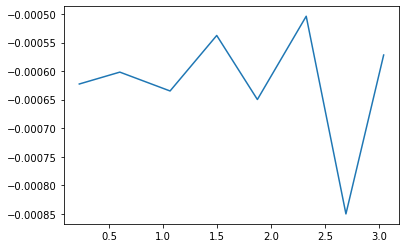

In [41]:
plt.plot(phi_binned, np.log10(MH_binned/0.0127))
# plt.ylim(-0.01, 0.01)